# Проект: классификация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [3]:
df = pd.read_csv('bank_fin.csv', sep = ';')
df.head(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0 $,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes


In [4]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
# ваш код
df.isna().sum()


age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

### Задание 2

In [5]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
# ваш код

for column in df.columns:
    print(column, ':', df[column].unique())

age : [59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
job : ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital : ['married' 'single' 'divorced']
education : ['secondary' 'tertiary' 'primary' 'unknown']
default : ['no' 'yes']
balance : [' 2 343,00 $ ' ' 45,00 $ ' ' 1 270,00 $ ' ... ' 1 594,00 $ '
 ' 2 593,00 $ ' '-134,00 $ ']
housing : ['yes' 'no']
loan : ['no' 'yes']
contact : ['unknown' 'cellular' 'telephone']
day : [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration : [1042 1467 1389 ... 1504  818 1812]
campaign : [ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17

### Задание 3

In [6]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
df['balance'] = df[~df['balance'].isnull()]['balance'].apply(lambda x: float(str(x).replace(',', '.').replace(' ', '')[:-1]))
df.head(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0.0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes


### Задание 4

In [7]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
# ваш код
print(np.round(np.mean(df['balance']),3))
df['balance'] = df['balance'].fillna(df['balance'].median())
df.info()

1529.129
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  int64  
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  float64
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


In [8]:
print(np.round(np.mean(df['balance']),3))

1526.936


### Задание 5

In [9]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
# ваш код
df['job'] = df['job'].apply(lambda x: df['job'].mode()[0] if x == 'unknown' else x)
df['education'] = df['education'].apply(lambda x: df['education'].mode()[0] if x == 'unknown' else x)

In [10]:
print(round(df[(df['job']==df['job'].value_counts().index[0]) & (df['education']==df['education'].value_counts().index[0])]['balance'].mean(), 3))

1598.883


### Задание 6

In [11]:
# удалите все выбросы для признака balance
# ваш код
IQR = df['balance'].quantile(0.75) - df['balance'].quantile(0.25)
df = df[(df['balance'] >= df['balance'].quantile(0.25) - 1.5*IQR) & (df['balance'] <= df['balance'].quantile(0.75) + 1.5*IQR)]
df.shape

(10105, 17)

## Часть 2:  Разведывательный анализ

### Задание 1

no     5424
yes    4681
Name: deposit, dtype: int64
no     0.536764
yes    0.463236
Name: deposit, dtype: float64


Text(0.5, 1.0, 'проверка сбалансированности целевой переменной')

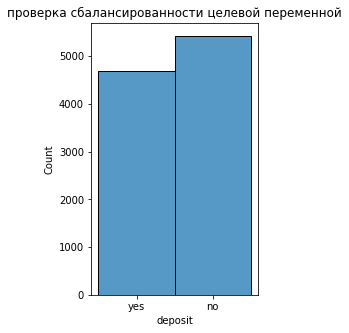

In [12]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
# ваш код
print(df['deposit'].value_counts())
print(df['deposit'].value_counts(normalize=True))
fig, ax = plt.subplots(figsize = (3, 5))
sns.histplot(df['deposit'])
ax.set_title('проверка сбалансированности целевой переменной')

### Задания 2 и 3

In [13]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
#ваш код
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


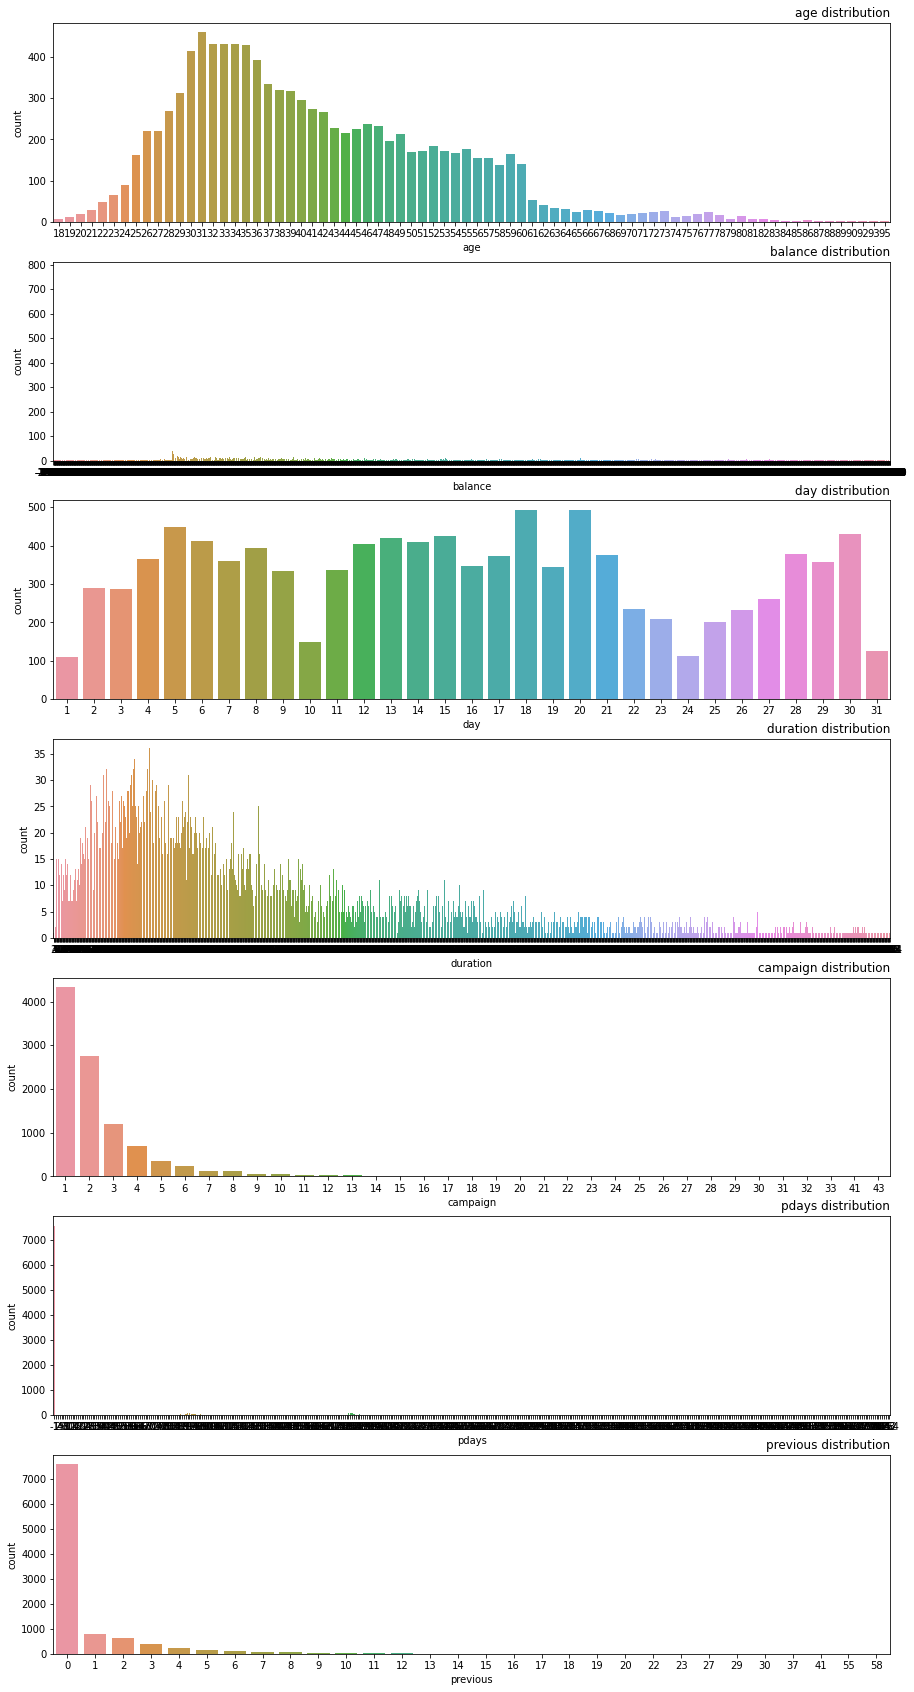

In [14]:
numeric_features = []
for column in df.columns:
    if (df[column].dtype == 'float') or (df[column].dtype == 'int64'): 
        numeric_features.append(column)
        
fig, axes = plt.subplots(ncols=1, nrows=len(numeric_features), figsize = (15, 30))
for index, feature in enumerate(numeric_features):
    sns.countplot(df[feature], ax=axes[index])
    axes[index].set_title(f'{feature} distribution', loc='right')

### Выводы
1. balance, duration, pdays!, - ненормальное распределение
2. duration, campaign, previous - выбросы


### Задания 4 и 5

In [15]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570,5424


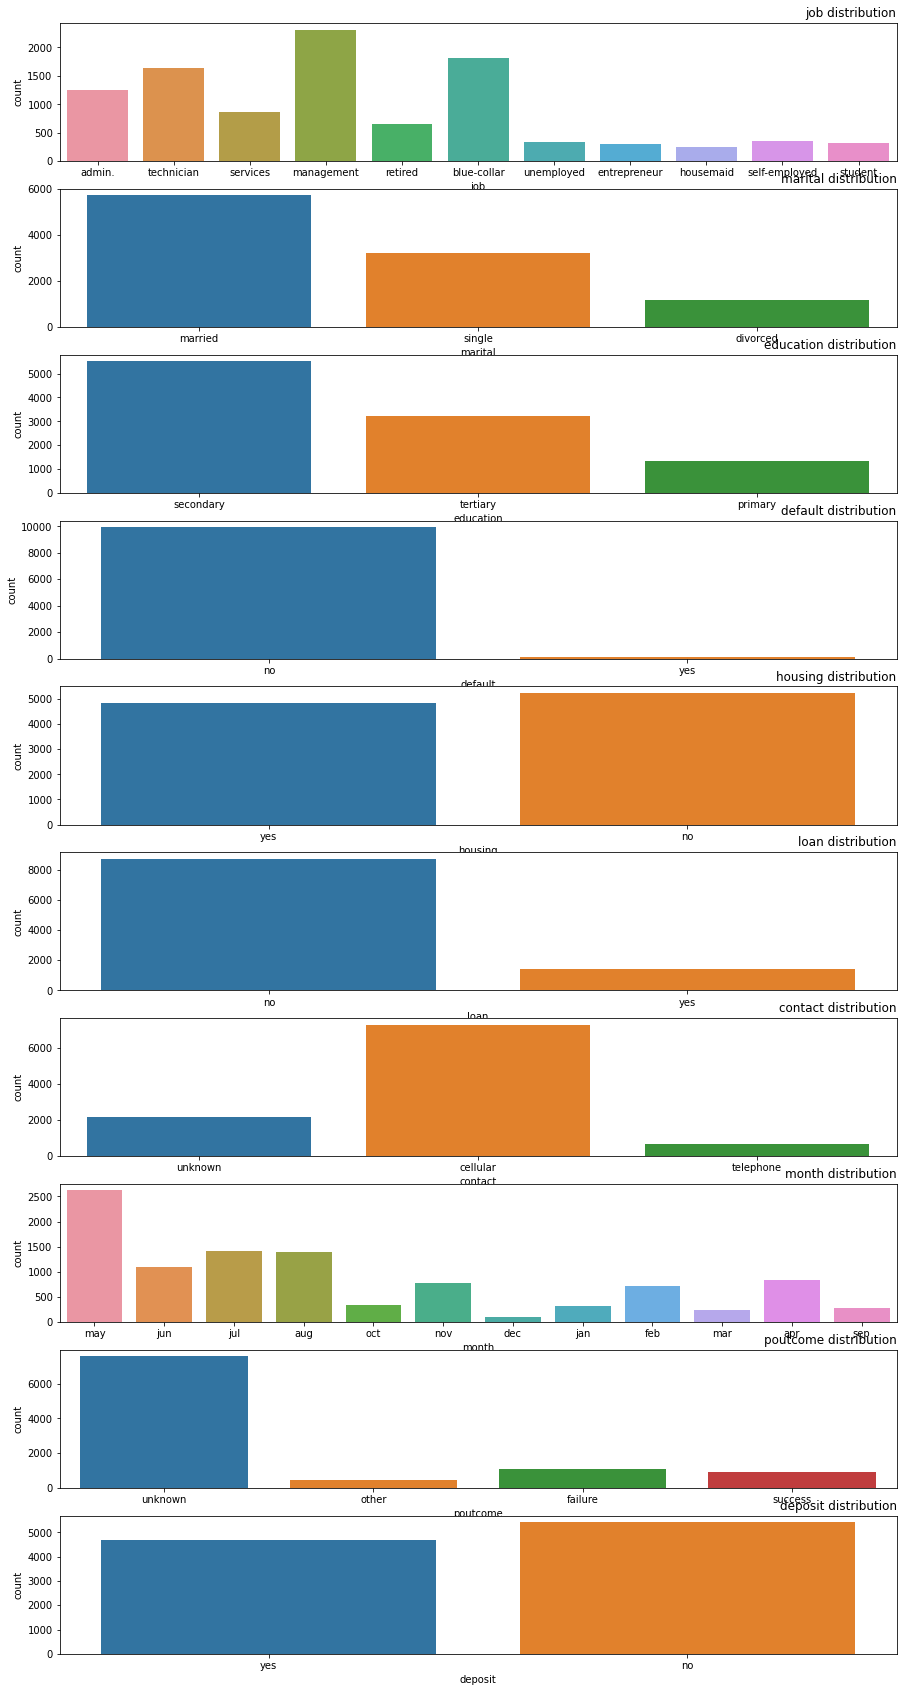

In [16]:
categorical_features = []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_features.append(column)

fig, axes = plt.subplots(ncols=1, nrows=len(categorical_features), figsize = (15, 30))
for index, feature in enumerate(categorical_features):
    sns.countplot(df[feature], ax=axes[index])
    axes[index].set_title(f'{feature} distribution', loc='right')


Выводы
- кампания была активнее всего в мае
- unknow Преобладает в poutcome 
- у большинства нет кредита (loan) 
- у большинства мобильный телефон (cellular)
- у большинства есть кредит на жилье (housing)
- у подавляющего большинства нет задолженностей
- у большинства secondary education
- у большинства status married
- много признаков только для months (12) и jobs(11)

### Задание 6

In [17]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# ваш код
df.groupby('poutcome')['deposit'].value_counts(normalize=True)

poutcome  deposit
failure   no         0.506763
          yes        0.493237
other     yes        0.550936
          no         0.449064
success   yes        0.911111
          no         0.088889
unknown   no         0.602642
          yes        0.397358
Name: deposit, dtype: float64

### Задание 7

In [18]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
# ваш код
(df[df['deposit'] == 'no'].groupby('month')['deposit'].count()/df.groupby('month')['deposit'].count()).nlargest(1)

month
may    0.67864
Name: deposit, dtype: float64

### Задание 8

Text(0.5, 1.0, 'Зависимость открытия депозита/отказа  от возраста')

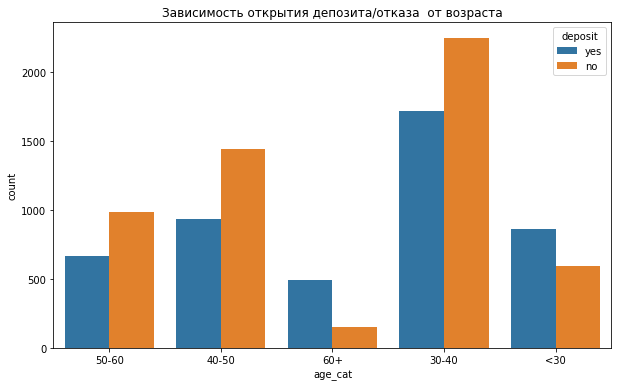

In [19]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
def age_category(age):
    if age < 30:
        return '<30'
    elif age < 40:
        return '30-40'
    elif age < 50:
        return '40-50'
    elif age < 60:
        return '50-60'
    else:
        return '60+'

df['age_cat'] = df['age'].apply(age_category)

fig, ax = plt.subplots(figsize = (10, 6))
sns.countplot(df['age_cat'], hue=df['deposit'])
ax.set_title('Зависимость открытия депозита/отказа  от возраста')

### Задания 9 и 10

Text(0.5, 1.0, 'Зависимость открытия депозита/отказа от семейного статуса')

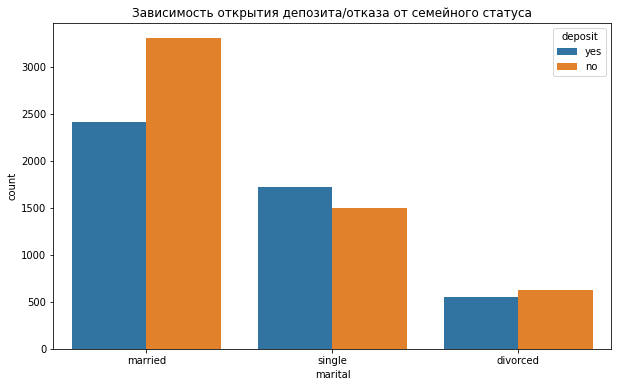

In [20]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(df['marital'], hue = df['deposit'])
ax.set_title('Зависимость открытия депозита/отказа от семейного статуса')

Text(0.5, 1.0, 'Зависимость открытия депозита/отказа от образования')

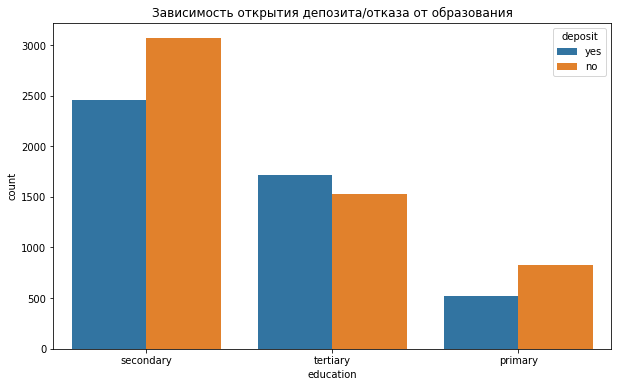

In [21]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(df['education'], hue = df['deposit'])
ax.set_title('Зависимость открытия депозита/отказа от образования')

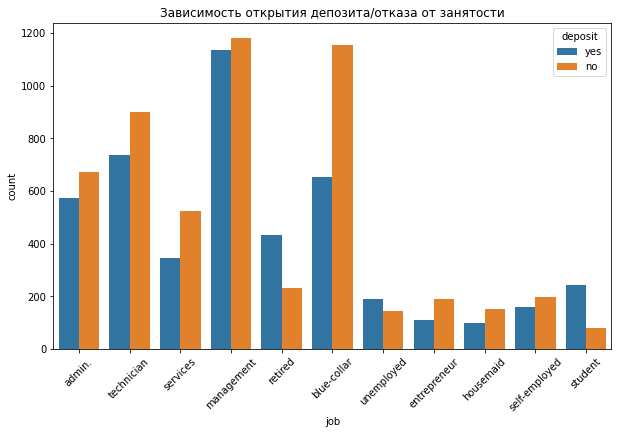

In [22]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(df['job'], hue = df['deposit'])
ax.set_title('Зависимость открытия депозита/отказа от занятости')
ax.xaxis.set_tick_params(rotation = 45)

In [23]:
df.groupby('job')['job'].value_counts().nlargest(1)

job         job       
management  management    2315
Name: job, dtype: int64

### Задание 11

marital    divorced  married  single
education                           
primary          96      339      82
secondary       283     1289     879
tertiary        174      784     755


<AxesSubplot:xlabel='marital', ylabel='education'>

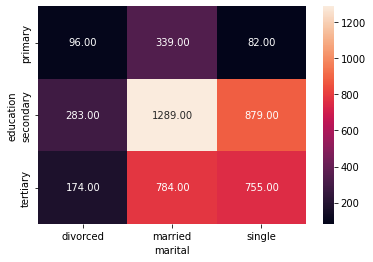

In [24]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)
df_yes = df[df['deposit'] == 'yes']
pivot_yes = pd.pivot_table(df_yes, index ='education', columns ='marital', values = 'deposit', aggfunc ='count')
print(pivot_yes )
sns.heatmap(pivot_yes, annot=True, fmt = '.2f') 

marital    divorced  married  single
education                           
primary          91      641     100
secondary       370     1830     866
tertiary        163      832     531


<AxesSubplot:xlabel='marital', ylabel='education'>

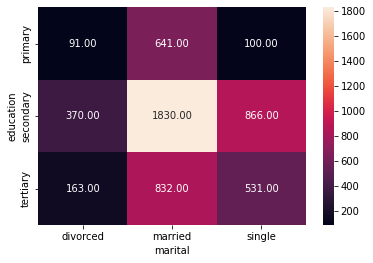

In [25]:
df_no = df[df['deposit'] == 'no']
pivot_no = pd.pivot_table(df_no, index ='education', columns ='marital', values = 'deposit', aggfunc ='count')
print(pivot_no )
sns.heatmap(pivot_no, annot=True, fmt = '.2f') 

### вывод
одни и те же сочетания признаков наиболее популярны как среди открывших кредит, так и среди не открывших. Здесь нет зависимости отказа от сочетания признаков

## Часть 3: преобразование данных

### Задание 1

In [27]:
# преобразуйте уровни образования
education_encoder = LabelEncoder()
education_encoder.fit(df['education'])
df['education'] = education_encoder.transform(df['education'])
df['education'].sum()

11995

In [28]:
# преобразуем возрастные группы с помощью порядкового кодирования
age_encoder = LabelEncoder()
df['age_cat'] = age_encoder.fit_transform(df['age_cat'])

### Задания 2 и 3

In [29]:
# преобразуйте бинарные переменные в представление из нулей и единиц для 'deposit'
df['deposit'] = df['deposit'].replace({'yes': 1, 'no': 0})

In [30]:
print(round(df['deposit'].std(), 3))

0.499


In [31]:
# преобразуйте бинарные переменные в представление из нулей и единиц для других признаков ('loan', 'default', 'housing')
binary_features = ['loan', 'default', 'housing']
for feature in binary_features:
    df[feature] = df[feature].apply(lambda x: 0 if x == 'no' else 1)

In [32]:
print(round((df['housing'].mean() + df['loan'].mean() + df['default'].mean()),3))

0.635


### Задание 4

In [33]:
# создайте дамми-переменные
print(df.shape)
df  = pd.get_dummies(df, columns=['job', 'marital', 'contact', 'month','poutcome'])
print(df.shape)

(10105, 18)
(10105, 46)


### Задания 5 и 6

In [34]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
corr_data = df.corr()
corr_data

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
age,1.000000,-0.191124,-0.009929,0.115164,-0.164196,-0.026357,0.000396,-0.006007,-0.001143,0.006107,...,0.009769,0.024785,-0.119656,0.026875,0.056998,0.036352,0.001994,-0.020942,0.060009,-0.031455
education,-0.191124,1.000000,-0.015692,0.043251,-0.094350,-0.052566,0.008989,-0.016869,-0.012280,0.024123,...,-0.036503,0.052196,-0.104157,0.028704,0.027617,0.030846,0.019845,0.015103,0.070489,-0.069069
default,-0.009929,-0.015692,1.000000,-0.110928,0.009551,0.074786,0.018724,-0.008162,0.033404,-0.037323,...,0.019626,-0.020028,-0.001761,0.000544,-0.023931,-0.016977,-0.025450,-0.017923,-0.041510,0.055032
balance,0.115164,0.043251,-0.110928,1.000000,-0.094919,-0.113089,-0.009987,0.025781,-0.042689,0.045155,...,0.039753,0.043832,-0.098073,0.081861,0.057041,0.047841,0.031040,0.028111,0.073358,-0.085456
housing,-0.164196,-0.094350,0.009551,-0.094919,1.000000,0.072252,-0.022644,0.038492,0.006257,0.064138,...,-0.073133,-0.075948,0.432605,-0.000219,-0.092026,-0.086893,0.085167,0.009830,-0.134477,0.024082
loan,-0.026357,-0.052566,0.074786,-0.113089,0.072252,1.000000,0.019136,0.001476,0.033889,-0.030788,...,-0.014897,-0.041105,0.002778,0.017720,-0.032357,-0.046196,0.007458,-0.019289,-0.082098,0.059235
day,0.000396,0.008989,0.018724,-0.009987,-0.022644,0.019136,1.000000,-0.016695,0.142169,-0.078757,...,-0.182032,-0.044303,-0.014580,0.056471,0.072179,-0.068744,-0.071175,-0.008806,-0.044366,0.085442
duration,-0.006007,-0.016869,-0.008162,0.025781,0.038492,0.001476,-0.016695,1.000000,-0.042576,-0.033053,...,-0.003061,-0.034640,0.007983,-0.015655,-0.012541,-0.012077,-0.039476,-0.009497,-0.025971,0.050571
campaign,-0.001143,-0.012280,0.033404,-0.042689,0.006257,0.033889,0.142169,-0.042576,1.000000,-0.105214,...,0.046763,-0.030574,-0.044348,-0.077307,-0.071519,-0.048672,-0.082282,-0.024854,-0.094260,0.134842
pdays,0.006107,0.024123,-0.037323,0.045155,0.064138,-0.030788,-0.078757,-0.033053,-0.105214,1.000000,...,-0.093551,0.024192,0.028678,-0.007350,0.079833,0.110907,0.608719,0.338049,0.326215,-0.824031


<AxesSubplot:>

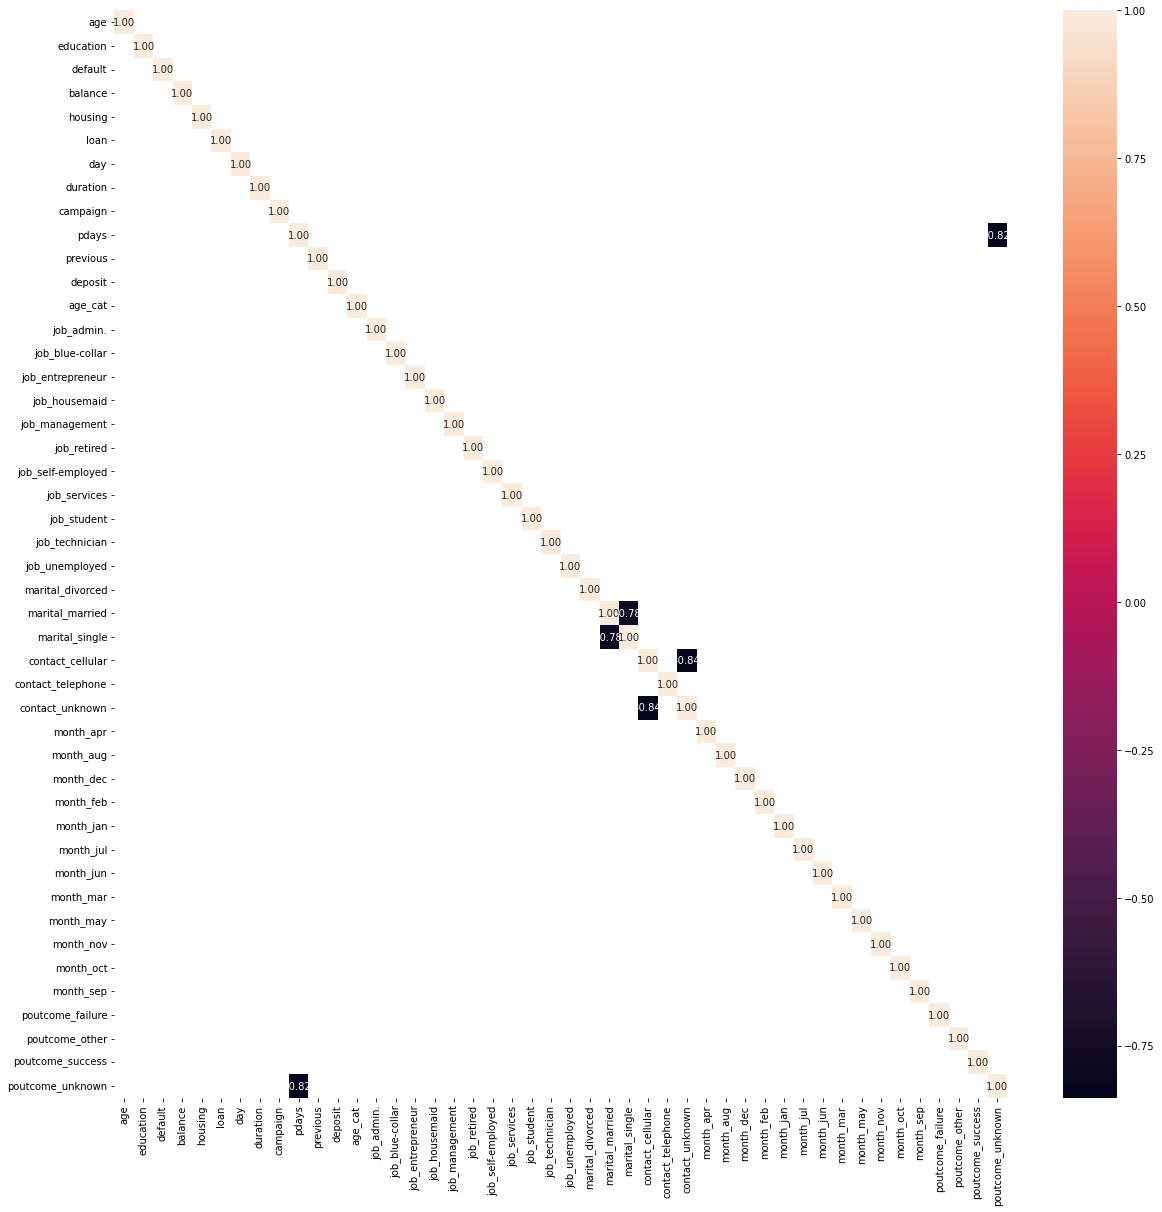

In [35]:
plt.figure(figsize=(20,20))  
sns.heatmap(corr_data[corr_data.abs()>0.65], annot=True, fmt = '.2f')

In [36]:
corr_with_target = df.corr()['deposit'].drop('deposit').abs().sort_values(ascending=False)
corr_with_target

duration             0.457818
poutcome_success     0.288491
contact_unknown      0.249294
poutcome_unknown     0.228300
contact_cellular     0.223944
housing              0.200290
month_may            0.168203
pdays                0.147917
previous             0.141102
age_cat              0.136243
balance              0.135893
month_mar            0.135348
campaign             0.130707
month_oct            0.130599
month_sep            0.125239
loan                 0.107240
job_student          0.105563
job_retired          0.100090
education            0.098253
marital_single       0.097005
job_blue-collar      0.095845
marital_married      0.094246
month_apr            0.092888
month_dec            0.085041
day                  0.056878
month_feb            0.044728
month_jul            0.042779
job_services         0.040433
poutcome_other       0.039319
job_unemployed       0.039196
default              0.038872
job_entrepreneur     0.032706
job_management       0.029566
month_nov 

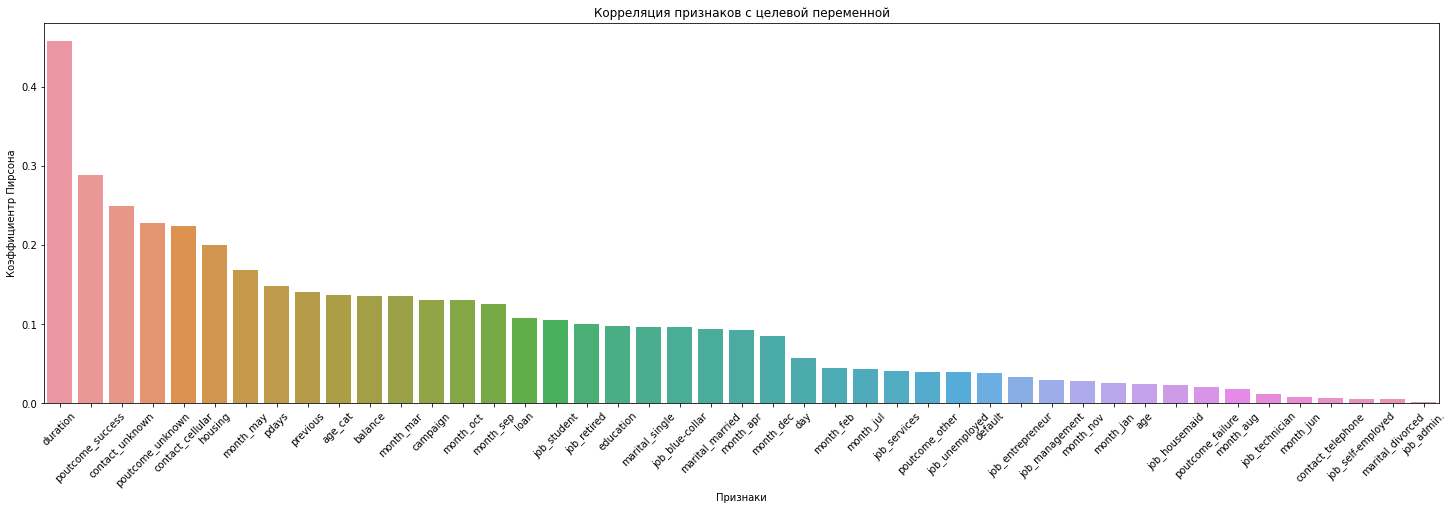

In [38]:
fig, ax = plt.subplots(figsize = (25, 7))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values)
ax.set_title('Корреляция признаков с целевой переменной')
ax.set_xlabel('Признаки')
ax.set_ylabel('Коэффициентр Пирсона')
ax.xaxis.set_tick_params(rotation = 45)

### Задания 7 и 8

In [39]:
X = df.drop('deposit', axis = 1)
y = df['deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

In [40]:
# рассчитайте необходимые показатели
print(len(y_test))
print(round(np.mean(y_test),2))
print(round(np.mean(y_train),2))

3335
0.46
0.46


### Задание 9

In [41]:
print(X_train.shape, X_test.shape)

(6770, 45) (3335, 45)


In [44]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков
Kbest_selector = SelectKBest(
    score_func=f_classif, #критерий отбора ANOVA
    k = 15 #количество признаков
)
Kbest_selector.fit(X_train, y_train)
print(Kbest_selector.get_feature_names_out())
X_train = X_train[Kbest_selector.get_feature_names_out()]
X_test = X_test[Kbest_selector.get_feature_names_out()]
print(X_train.shape, X_test.shape)

['balance' 'housing' 'duration' 'campaign' 'pdays' 'previous' 'age_cat'
 'contact_cellular' 'contact_unknown' 'month_mar' 'month_may' 'month_oct'
 'month_sep' 'poutcome_success' 'poutcome_unknown']
(6770, 15) (3335, 15)


### Задание 10

In [45]:
# нормализуйте данные с помощью minmaxsxaler
mm_scaler = preprocessing.MinMaxScaler()
mm_scaler.fit(X_train)
X_train_scaled = mm_scaler.transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

In [46]:
print(round(X_test_scaled[:, 0].mean(),2)) 

0.47


# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [47]:
# обучите логистическую регрессию и рассчитайте метрики качества
lr_model = linear_model.LogisticRegression(solver ='sag', random_state = 42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

y_test_pred = lr_model.predict(X_test_scaled)

np.round(metrics.accuracy_score(y_test, y_test_pred), 4)

0.8048

### Задания 2,3,4

In [48]:
# обучите решающие деревья, настройте максимальную глубину
tree_model = tree.DecisionTreeClassifier(criterion= 'entropy', random_state=42)
tree_model.fit(X_train_scaled, y_train)
y_train_pred = tree_model.predict(X_train_scaled)
y_test_pred = tree_model.predict(X_test_scaled)

print('Accuracy train: {}'.format(metrics.accuracy_score(y_train, y_train_pred)))
print('Accuracy test: {}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Accuracy train: 1.0
Accuracy test: 0.7472263868065967


In [49]:
print(tree_model.get_depth()) #определим глубину дерева, чтобы определиться с границами перебора

36


In [50]:
max_depth_list = range(3, 37, 1) #перебираем глубину деревьев от 3 до 36 в цикле
train_accuracy_list = []
test_accuracy_list = []
for max_depth in max_depth_list:
    tree_model = tree.DecisionTreeClassifier(
        max_depth = max_depth,
        criterion = 'entropy',
        random_state = 42)
    tree_model.fit(X_train_scaled, y_train)
    train_accuracy_list.append(metrics.accuracy_score(y_train, tree_model.predict(X_train_scaled))) #записываем метрики для train
    test_accuracy_list.append(metrics.accuracy_score(y_test, tree_model.predict(X_test_scaled))) #записываем метрики для test
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


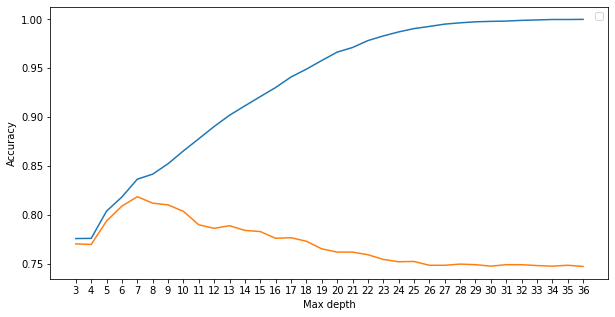

In [51]:
fig, ax = plt.subplots(figsize = (10, 5)) #визуализируем, как меняются метрики в зависимости от глубины дерева
sns.lineplot(x = max_depth_list, y = train_accuracy_list, legend='auto')
sns.lineplot(x = max_depth_list, y = test_accuracy_list, legend='auto')
ax.set_xlabel('Max depth')
ax.set_ylabel('Accuracy')
ax.legend()
ax.set_xticks(max_depth_list); 

In [52]:
tree_model = tree.DecisionTreeClassifier(
        max_depth = 6,
        criterion = 'entropy',
        random_state = 42)
tree_model.fit(X_train_scaled, y_train)
y_test_pred = tree_model.predict(X_test_scaled)
print('Accuracy test: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Accuracy test: 0.81


### Задание 5

In [55]:
# подберите оптимальные параметры с помощью gridsearch

from sklearn import model_selection
param_grid = {
    'min_samples_split': [2, 5, 7, 10],
    'max_depth':[3,5,7]
} #задаем сетку параметров

grid_searcher = model_selection.GridSearchCV(
    param_grid=param_grid,
    estimator=tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 42),
    cv=5,
    scoring = 'f1',
    return_train_score=True,
    n_jobs=-1    
) #инициализируем GridSearchCV, подаем в него сетку параметров

grid_searcher.fit(X_train_scaled, y_train) #поиск опт.параметров


y_test_pred = grid_searcher.predict(X_test_scaled) #предсказание модели с подобранными параметрами
print('f1 score test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred))) #оценка качества

f1 score test: 0.81


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [56]:
# обучите на ваших данных случайный лес

rf_model = ensemble.RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    min_samples_leaf=5,
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train_scaled, y_train)
y_test_pred = rf_model.predict(X_test_scaled)

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



### Задания 2 и 3

In [57]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
gr_boost_model = ensemble.GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    min_samples_leaf=5,
    max_depth=5,
    random_state=42
)
gr_boost_model.fit(X_train_scaled, y_train)

y_test_pred = gr_boost_model.predict(X_test_scaled)

print('f1 test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print(metrics.classification_report(y_test, y_test_pred))

f1 test: 0.82
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



### Задание 4

In [59]:
# объедините уже известные вам алгоритмы с помощью стекинга
estimators = [('lr', lr_model), ('tree', tree_model),  ('boost', gr_boost_model)] #задаем модели для стекинга
stek_model = ensemble.StackingClassifier(
    estimators=estimators, #передаем первичные модели для стекинга
    final_estimator=lr_model #задаем финальную модель
)

stek_model.fit(X_train_scaled, y_train)
y_test_pred = stek_model.predict(X_test_scaled)

print(metrics.classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1790
           1       0.80      0.81      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335



### Задание 5

In [60]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга

from sklearn.feature_selection import RFE
FRE_selector = RFE(
    estimator = gr_boost_model,
    n_features_to_select=3) #создаем объект класса RFE, указываем, что нужно отобрать 3 признака
FRE_selector.fit(X_train, y_train)
print(FRE_selector.get_feature_names_out())

['balance' 'duration' 'poutcome_success']


### Задания 6,7,8

In [61]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna
import optuna

def optuna_searcher(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
    max_depth = trial.suggest_int('max_depth', 10, 30, 1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1) #задаем пространства признаков для оптимизации
    
    model = ensemble.RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth = max_depth,
        min_samples_leaf = min_samples_leaf,
        random_state=42   
    ) #задаем модель для которой проводится оптимизация
    model.fit(X_train_scaled, y_train)
    score = metrics.f1_score(y_test, model.predict(X_test_scaled)) #задаем метрику для оптимизации
    return score

study = optuna.create_study(study_name='Optuna rf optimizer', direction='maximize') #создаем объект для оптимизации
study.optimize(func = optuna_searcher, n_trials=20) #проводим оптимизацию
print(study.best_params)


best_model = ensemble.RandomForestClassifier(**study.best_params, random_state=42) #строим модель с найденными оптимальными параметрами
best_model.fit(X_train_scaled, y_train)
y_test_pred = best_model.predict(X_test_scaled)

print('f1 test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))    #оцениваем качество

[I 2023-02-17 17:53:51,647] A new study created in memory with name: Optuna rf optimizer
[I 2023-02-17 17:53:53,203] Trial 0 finished with value: 0.8138281002220107 and parameters: {'n_estimators': 160, 'max_depth': 19, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.8138281002220107.
[I 2023-02-17 17:53:54,318] Trial 1 finished with value: 0.8129564941251192 and parameters: {'n_estimators': 123, 'max_depth': 10, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.8138281002220107.
[I 2023-02-17 17:53:55,768] Trial 2 finished with value: 0.810965890978642 and parameters: {'n_estimators': 142, 'max_depth': 28, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8138281002220107.
[I 2023-02-17 17:53:56,816] Trial 3 finished with value: 0.815049004110022 and parameters: {'n_estimators': 122, 'max_depth': 26, 'min_samples_leaf': 7}. Best is trial 3 with value: 0.815049004110022.
[I 2023-02-17 17:53:58,168] Trial 4 finished with value: 0.8176656151419559 and parameters: {'n_estim

{'n_estimators': 144, 'max_depth': 26, 'min_samples_leaf': 4}
f1 test: 0.82


In [62]:
!pip freeze > requirements.txt